## Homework 2

Name: 

Collaborators:

due Saturday 10/17/2015 before 23:55

###Question 1: Fixed Point Method

The fixed point method is an iterative algorihtm usually used to solve algebraic equations. In adition, it is a powerful theoretical tool to find (and show existence and uniqueness) solutions to ODE's (normally called Picard-Lindelof Theorem, https://en.wikipedia.org/wiki/Picard–Lindelöf_theorem)

1.a You will implement the fixed point method, for an input function $f$, an initial guess $p0$, a tolerance $\epsilon$, and a maximum number of iterations $Nmax$. Your function will have an optional paremeter named $history$, which by default will be false. 

By default, the function will output the final guess, $p$, with a tolerance $\epsilon$. In this case we follow Alg. 2.2 in your textbook. The tolerance is achieved when $|p_{n+1} - p_n | < \epsilon$. 

If history is true, then the output will be a vector with all the intermediary values of the fixed point iteration. The length of the vector will be the number of iterations needed to converge (up to a tolerance $\epsilon$). (you can use the push! function in Julia, to initialize an empty vector you can use a = Float[]).

If the tolerance is not achieved in the Nmax iterations you will raise an error, with a descriptive message, using the function error .

In [3]:
function fixedPointMethod(f,p0, ϵ, Nmax; history=false)
    # if history true, declare an empty array
    history && (pHist = Float64[]) 
    # loop 
    for i = 1:Nmax # you can use a while if you want
        p = f(p0) # p_{n+1} = f(p_n)
        history && push!(pHist,p) # if history is true, push p_{n+1} into the pHist
        if abs(p-p0)<ϵ  # if the update is smaller than the tolerance return the answer
            history ? (return pHist) : (return p)
        end
        # update the p0 to start a new iteration
        p0 = p
    end
    error("Convergence not achieved within the specified number of iterations \n")
end

fixedPointMethod (generic function with 1 method)

1.b Write a small function that computes $\sqrt{2}$. Your function will use your fixedPointMethod to compute the fixed point $x = f(x)$ for  $f(x) = x/2 + 1/x $, up to a tolerance of $10^{-6}$. You can pick any initial guess $p0 \in [1,2]$.

Hint: The main idea is to define the function $f$ within computeSqrt2FixedPoint() and use fixedPointMethod to find $\sqrt{2}$.

In [4]:
function computeSqrt2FixedPoint()
    # define the function
    g(x) = x/2 + 1/x
    # use your function to return the approximation of the root
    return fixedPointMethod(g,2.0, 1e-6, 30; history=true)
end

computeSqrt2FixedPoint (generic function with 1 method)

1.c Using the Fixed Point method and the history parameter, plot the error of the succesive approximations of $\sqrt{2}$ (using Gadfly and a semilog scale). What is the convergence rate in this case?

Hint: In order to get a semi-log scale you need to use plot( x = , y = , Scale.y_log10), remember that x and y need to have the same length. Theorem 2.4 and Corollary 2.5 in your textbook may help you to explain the behavior of the error plot.

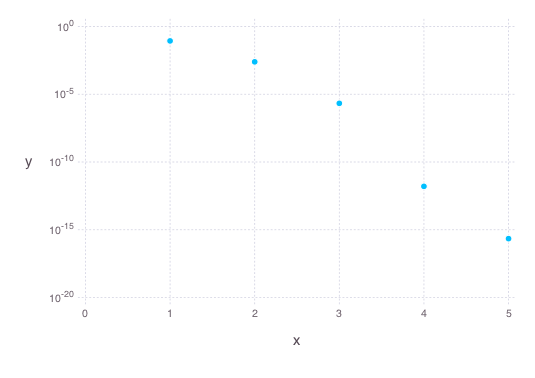

In [5]:
## write your script in here
using Gadfly
# compute the error
Error = abs(computeSqrt2FixedPoint() - sqrt(2))
# plot the error, the vectors associated to x and y need to have the same lenght
plot(x = 1:size(Error)[1], y = Error[:] ,  Scale.y_log10)

Answer: The error plot "looks" like a line, then we can observe that the fixed point has a linear convergence rate. 

1.d The iteration method does not converge for every $f$; find a counter-example; i.e. a function and a initial guess for which the iteration method diverges. Write a small script that shows that your method does not converge and explain why. 

Hint: take a look at you book, you have some theorems that guaratees the convergence of the method. Try to find a function that violates the hypothesis of the theorems.

In [6]:
# write your script here
g(x) = x^3
print(fixedPointMethod(g,0.99999, 1e-6, 30; history=true), "\n")
fixedPointMethod(g,1.00001, 1e-6, 30; history=true)

[0.9999700002999992,0.9999100035999164,0.9997300350970766,0.9991903239147009,0.9975729379393882,0.9927364714119775,0.9783673075631822,0.9364957193115018,0.8213294392708866,0.5540540950724816,0.17008127679342774,0.00492005006754484,1.1909912390205214e-7,1.6893735894254487e-21]


LoadError: Convergence not achieved within the specified number of iterations 

while loading In[6], in expression starting on line 4

Answer: In order to convergence, the fixed point method need a function that is a contraction within an interval, and a initial guess in that interval. In other words, we need a function that it is Lipchitz with Liptshitz constant less than one. g(x) = x^3 is Liptchitz with constant less than one only in (-1,1). If the initial guess is outside this interval, each time we apply $g$ we have that $p_{n+1} > p_n + (1-p_0)$ meaning that the sequence diverges.

### Question 2: Newton's Method

Another popular method for finding zeros of functions is the Newton Method. In particualr, the Newton's method (or variants) are widely used within the optimization community to find extremal points. 

2.a You will implement the Newton method with an input function $f$ with derivative $dfdx$, initial guess $p0$, tolerance $\epsilon$, as defined in Alg. 2.3, and maximun number of iterations $Nmax$. The parameter $history$ will have the same behavior as in the fixed point method; if the method does not converge to the desidered tolerance in $Nmax$ iterations, you will raise an error.  

In [7]:
function newtonMethod(f,dfdx, p0, ϵ, Nmax; history=false)
    # if history true, declare an array an push p0 inside
    history && (pHist = [p0][:])
    # foor loop
    for i = 1:Nmax
        p = p0 - f(p0)/dfdx(p0) # p_{n+1} = p_n - f(p_n)/f'(p_n)
        history && push!(pHist, p) # if history is true, push p_{n+1} into the pHist
        if abs(p-p0)<ϵ  # if the update is smaller than the tolerance return the answer
            history? (return pHist): (return p)
        end
        p0 = p # update p0 to start a new iteration
    end
    error("Accuracy not achieved within the specified number of iterations")
end

newtonMethod (generic function with 1 method)

2.b In a manner analogous to the fixedPointMethod, write a small function that computes $\sqrt{2}$. Your function will use the newtonMethod (above) to compute the zero of $f(x) = -x/2 + 1/x$, up to a tolerance of $10^{-6}$. Pick any initial guess $p0 \in [1,2].$

In [8]:
function computeSqrt2Newton()
    g(x) = -x/2 + 1/x
    dgdx(x) = -1/2 - 1/x^2
    return newtonMethod(g,dgdx, 1.5, 1e-6, 60; history=true)
end
computeSqrt2Newton()- sqrt(2)

5-element Array{Float64,1}:
  0.0857864  
 -0.00244886 
 -2.1239e-6  
 -1.59495e-12
 -2.22045e-16

2.c Using the Newton method and the history parameter, plot the error of the succesive approximations of $\sqrt{2}$ (use Gadlfy and a semilog scale). What is the convergence rate in this case, and how does it compare to the fixed point method? 

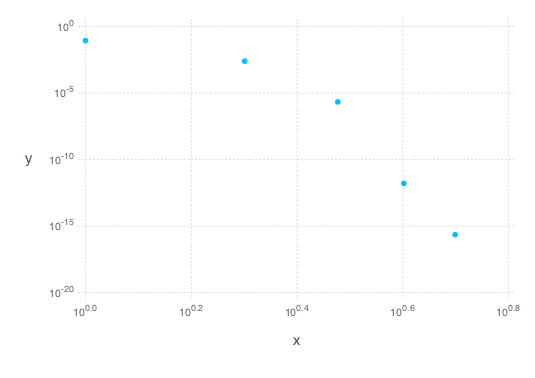

In [9]:
# write your script here
using Gadfly
Error = abs(computeSqrt2Newton() - sqrt(2))
plot(x = 1:size(Error)[1], y = Error[:] ,  Scale.y_log10, Scale.x_log10 )

Answer: The Newton's method has a quadratic convergence given that the initial guess is close enough, $f'$ is bounded away from zero, and $f''$ is continuous. We can observe in the plot something like a parabola; however, the number of points is too small to properly claim an asymptotic rate of convergence.

Newton's method exhibits quadratic convergence under the assumptions mentioned above; whereas, the fixed point method exhibits only linear convergence. Morally speaking, the Newton's method uses more information (the derivative) so we should hope for a faster convergence.

2.d As you have seen in class, the Newton method is sensible to the initial guess; find an function $f$ and two initial guesses such that the Newton's method converges to a different limit, write a script that shows this behavior and explain (concisely) why.

1.414213562373095
-1.414213562373095

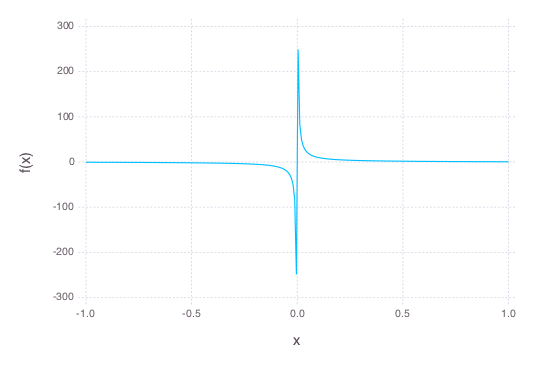

In [10]:
# write your script here
g(x) = -x/2 + 1/x
dgdx(x) = -1/2 - 1/x^2
print(newtonMethod(g,dgdx, 0.001, 1e-6, 60; history=true)[end], "\n")
print(newtonMethod(g,dgdx, -0.001, 1e-6, 60; history=true)[end])
plot([g], -1,1)

Answer: The Newton's method is a local method. It uses only local information to find the roots. The Newton's method will converge to the closest down-hill root. From the plott of $g$ we can conclude that if $p_0$ is negative the method will converge to $-\sqrt{2}$, otherwise it will converge to $\sqrt{2}$.

### Question 3: Companion Matrix method

You have seen how to use iterative methods to compute roots of algebraic equations. However, when you are dealing with polynomials you have faster methods. One of the best methods is the Companion Matrix method. The method is based on the Cayley-Hamilton theorem (https://en.wikipedia.org/wiki/Cayley–Hamilton_theorem). 

The method transforms a root-finding problem to a eigenvalue problem.

The main idea can be summarized as follows: for a given polynomail $p(x)$ you find a matrix $M$ (usually called the companion matrix: https://en.wikipedia.org/wiki/Companion_matrix) whose characteristic polynomial is $p(x)$, and you compute the eigenvalues of $M$. By the Cayley-Hamilton theorem, the eigenvalues of the companion matrix, $M$, are exactly the roots of  $p(x)$. 

Let $p(x) = \sum_{i=0}^n \alpha_i x^i$ be a polynomial, such that $\alpha_n \neq 0$, then its companion matrix, which is a $n\times n$ matrix, is given by

\begin{equation}
    M = \left [  \begin{array}{cccccc} 
                    0 & 0      & 0      &  0 & -\alpha_0/\alpha_n \\
                    1 & 0      & 0      &  0 & -\alpha_1/\alpha_n \\ 
                    0 & 1 & \ddots &  0 & \vdots \\ 
                    0 & 0      & \ddots &  0 & -\alpha_{n-2}/\alpha_n \\ 
                    0 & 0      & 0      &  1 & -\alpha_{n-1}/\alpha_n \\ 
              \end{array}
     \right ].
\end{equation}

You can show that the characteristic polynomial of $M$ is exactly $p$.

#### Example

   We want to compute $\sqrt{2}$, which is one of the roots of $p(x) = x^2 - 2$. 
   The companion matrix is given by 
   \begin{equation}
           M = \left [ \begin{array}{cc}
                       0 & 2 \\
                       1 & 0
                       \end{array} 
               \right ]
   \end{equation}
   Then we compute the eigenvalues of $M$, and we obtain the two roots, positive and negative. 
   
   You can easily do this using: 

In [11]:
M = [0 2;  # creating the companion matrix
     1 0] 
(roots, vec) = eig(M)  # computing the eigenvalues
print(roots[1] - sqrt(2))

0.0

As you can see, this is the method used by Julia (and MATLAB) to compute squared roots.

3.a You will write a function that evaluates $p(x_j) = \sum_{i=0}^n \alpha_i x^i_j$, the input of the function are a vector $\mathbf{x}$, such that $\mathbf{x}_j = x_j$, and a vector $\mathbf{alpha}$ that contains the coefficients $\alpha_i$ such that $\alpha_n \neq 0$. Your function should support element-wise evaluation. 

In [12]:
function evalPolynomial(x, alpha)
    p = 0*x # initialize the vector to acumulate the results (it needs to have the same dimension than x)
    for i = 0:length(alpha)-1
        p += alpha[i+1]*x.^(i)
    end
    return p 
end

evalPolynomial (generic function with 1 method)

As a example, if $\mathbf{alpha} = [1\, 3\, 4\, 1]$, then the corresponding polynomial is $p(x) = 1 + 3x + 4x^2 + x^3$. If the input of your function evalPolynomial is $\mathbf{x} = [0 \, 1\, 3]$ and $\mathbf{alpha} = [1\, 3\, 4\, 1]$ then the output should be $[p(0)\, p(1) \, p(3)] = [1 \, 9 \,\, 73  ]$.

3.b You will write a function that computes the companion matrix for a polynomial of deegre $n$ given by $p(x) = \sum_{i=0}^n \alpha_i x^i$, such that the coefficients are stored in a vector $\alpha$. We suppose that $\alpha_n \neq 0$.

Hint: you can use something like:  ans += alpha[i]*x.^(i-1).

In [13]:
function companionMatrix(alpha)
    n = length(alpha)-1  # the deegre of the polynomial
    M = diagm(ones(n-1,1)[:],-1) # we build and fill the matrix with ones in the first subdiagonal
    M[:,end] = -alpha[1:end-1]/alpha[end]  # we put the coefficient in the righ-most column of M
    return M
end

companionMatrix (generic function with 1 method)

3.c Using your function companionMatrix, you will implement a root finding algorithm, that provides all the roots for a polynomial whose coefficients are stored in a vector alpha.

In [14]:
function rootFindingCompanionMatrix(alpha)
    (root, eigVec) = eig(companionMatrix(alpha)) # we compute the companion matrix and compute the eigenvalues
    return root
end

rootFindingCompanionMatrix (generic function with 1 method)

Use your evalPolynomial function to test that your rootFinding algorithm is correct

In [15]:
beta = [1 2 3 4 5 6];
evalPolynomial(rootFindingCompanionMatrix(beta), beta)

5-element Array{Complex{Float64},1}:
 1.33227e-15+6.66134e-15im 
 1.33227e-15-6.66134e-15im 
          1.11022e-15+0.0im
          1.66533e-16+0.0im
          1.66533e-16+0.0im

You should try with different betas in the script above. The output of the script should be small.